# Exercise 7: Question (3)

## Submitted by:  Neelkanth Rawat, Linus Lauer, Patrick Alvarado


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
data_file= "/content/data_08_prostate.csv"
df=pd.read_csv(data_file)

In [3]:
df

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-1.645861,-1.787678,-1.872101,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,-0.430783
1,-1.999313,-0.674124,-0.791989,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,-0.162519
2,-1.587021,-1.945989,1.368234,-1.030029,-0.525657,-0.867655,0.344407,-0.156155,-0.162519
3,-2.178174,-0.748683,-0.791989,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,-0.162519
4,-0.510513,-0.445921,-0.251933,-1.030029,-0.525657,-0.867655,-1.047571,-0.868957,0.371564
...,...,...,...,...,...,...,...,...,...
92,1.262444,0.452795,0.558151,-1.030029,1.902379,1.079149,0.344407,1.269449,4.385147
93,2.107397,0.494314,-2.682185,-1.030029,1.902379,1.688267,0.344407,0.556647,4.684443
94,1.328267,-0.519166,-1.602073,-1.030029,1.902379,1.900197,0.344407,-0.512556,5.143124
95,1.307045,0.245360,0.558151,1.010033,1.902379,1.249088,0.344407,1.982251,5.477509


In [4]:
df.columns.to_list(), len(df.columns.to_list())

(['lcavol',
  'lweight',
  'age',
  'lbph',
  'svi',
  'lcp',
  'gleason',
  'pgg45',
  'lpsa'],
 9)

In [5]:
# Define the feature matrix X
X = df[['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']]

# Add a column of ones as the first column for the intercept
X.insert(0, 'intercept', 1)

# Display the updated feature matrix X
print(X.head())


   intercept    lcavol   lweight       age      lbph       svi       lcp  \
0          1 -1.645861 -1.787678 -1.872101 -1.030029 -0.525657 -0.867655   
1          1 -1.999313 -0.674124 -0.791989 -1.030029 -0.525657 -0.867655   
2          1 -1.587021 -1.945989  1.368234 -1.030029 -0.525657 -0.867655   
3          1 -2.178174 -0.748683 -0.791989 -1.030029 -0.525657 -0.867655   
4          1 -0.510513 -0.445921 -0.251933 -1.030029 -0.525657 -0.867655   

    gleason     pgg45  
0 -1.047571 -0.868957  
1 -1.047571 -0.868957  
2  0.344407 -0.156155  
3 -1.047571 -0.868957  
4 -1.047571 -0.868957  


# 3(b)

In [6]:
X_mat=X.values
X_mat.shape

(97, 9)

In [7]:
rank_X= np.linalg.matrix_rank(X_mat)
print(f"rank of X is: {rank_X}"); print("shape of X:",X_mat.shape)

rank of X is: 9
shape of X: (97, 9)


* The rank of our data matrix X is 9 which is min(97,9)= full rank of X!

### Y data

In [8]:
### y data
y = df['lpsa']
print(y.head())

0   -0.430783
1   -0.162519
2   -0.162519
3   -0.162519
4    0.371564
Name: lpsa, dtype: float64


In [9]:
y_mat=y.values

# 3-(a) Correlation evaluation:

In [10]:
# Calculating the correlation matrix
correlation_matrix = df.corr()

In [11]:
correlation_matrix

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
lcavol,1.000000,0.194128,0.225000,0.027350,0.538845,0.675310,0.432417,0.433652,0.734460
lweight,0.194128,1.000000,0.307529,0.434935,0.108778,0.100238,-0.001276,0.050847,0.354120
age,0.225000,0.307529,1.000000,0.350186,0.117658,0.127668,0.268892,0.276112,0.169593
lbph,0.027350,0.434935,0.350186,1.000000,-0.085843,-0.006999,0.077820,0.078460,0.179809
svi,0.538845,0.108778,0.117658,-0.085843,1.000000,0.673111,0.320412,0.457648,0.566218
lcp,0.675310,0.100238,0.127668,-0.006999,0.673111,1.000000,0.514830,0.631528,0.548813
gleason,0.432417,-0.001276,0.268892,0.077820,0.320412,0.514830,1.000000,0.751905,0.368987
pgg45,0.433652,0.050847,0.276112,0.078460,0.457648,0.631528,0.751905,1.000000,0.422316
lpsa,0.734460,0.354120,0.169593,0.179809,0.566218,0.548813,0.368987,0.422316,1.000000


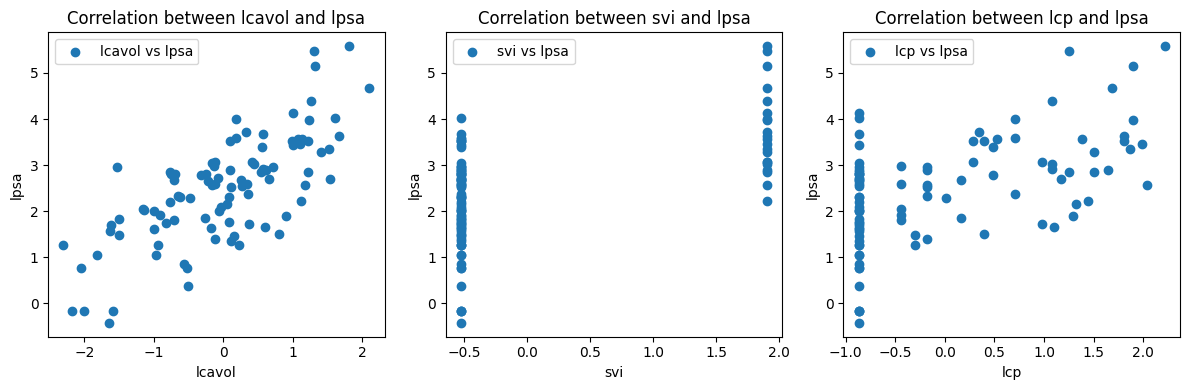

In [12]:
# Getting the top three features with the strongest correlations with 'lpsa'
top_features = correlation_matrix['lpsa'].abs().sort_values(ascending=False).index[1:4]

# Plotting the correlations
plt.figure(figsize=(12,4))
for i,feature in enumerate(top_features):
    plt.subplot(1,3,i+1)
    plt.scatter(df[feature], df['lpsa'], label=f'{feature} vs lpsa')
    plt.xlabel(feature)
    plt.ylabel('lpsa')
    plt.title(f'Correlation between {feature} and lpsa')
    plt.legend()
    plt.tight_layout()
plt.show()

# 3.(c) Splitting the data into training and test dataset

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_mat,y,test_size=0.3,random_state=42)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((67, 9), (30, 9), (67,), (30,))

In [15]:
### reshaping the ys:
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

y_train.shape, y_test.shape

((67, 1), (30, 1))

# 3.(d) Implementing the `ordinary least squares solver`! (without using the sklearn library)

In [16]:
import numpy as np
from dataclasses import dataclass, field
@dataclass
class OrdinaryLeastSquares:
  model_params: np.ndarray = field(init=False)
  def __post_init__(self):
    self.model_params = None

  def fit(self, X_train_: np.ndarray, y_train_: np.ndarray) -> None:
    '''
      for the ordinary least squares I need to solve the normal equation
      w= (X^{T} X)^{-1} X^{T}y
    '''
    x_t_x= np.matmul(np.transpose(X_train_),X_train_)

    det_x_t_x = np.linalg.det(x_t_x)
    if np.isclose(det_x_t_x, 0):
        raise ValueError("Matrix X_train^T X_train is singular!")

    inverse_x_t_x= np.linalg.inv(x_t_x)
    inv_times_XT= np.matmul(inverse_x_t_x,np.transpose(X_train_))
    self.model_params = np.matmul(inv_times_XT, y_train_)
    print("fit function was called. we are leaving it now!")

  def predict(self, X_test_: np.ndarray) -> np.ndarray:
    '''
      Returns:
      y_pred= WX_test
    '''
    y_pred = np.matmul(X_test_,self.model_params)
    return y_pred

  def rmse(self, X_test_: np.ndarray, y_test_: np.ndarray) -> float:
    '''
    Calculates the rmse using the formula:
    rmse= np.sqrt(np.mean((y_pred - y_test_)**2))
    '''
    y_pred=self.predict(X_test_)
    rmse = np.sqrt(np.mean((y_pred - y_test_)**2))
    return rmse

In [17]:
ols_model = OrdinaryLeastSquares()
ols_model.fit(X_train, y_train)
print(f"params:{ols_model.model_params.shape}")
print("model params are:"); print(ols_model.model_params)
print("the first entry is the intercept/bias, remaining are the weights/coefficients")

predictions = ols_model.predict(X_test)
rmse_value = ols_model.rmse(X_test, y_test)
print("RMSE:", rmse_value)

fit function was called. we are leaving it now!
params:(9, 1)
model params are:
[[ 2.45462916]
 [ 0.75271916]
 [ 0.24358154]
 [-0.19201857]
 [ 0.11429899]
 [ 0.3585389 ]
 [-0.23917874]
 [ 0.06634662]
 [ 0.13186029]]
the first entry is the intercept/bias, remaining are the weights/coefficients
RMSE: 0.6941798374525129


### Comparing our results with the sklearn's `LinearRegression()`

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [19]:
ols_sklearn=LinearRegression()
ols_sklearn.fit(X_train, y_train)

# Print the coefficients and intercept
print("Coefficients from sklearn:", ols_sklearn.coef_)
print("Intercept from sklearn:", ols_sklearn.intercept_)

preds_sklearn_ols=ols_sklearn.predict(X_test)

rmse_sklearn = np.sqrt(mean_squared_error(y_test, preds_sklearn_ols))
print("RMSE:", rmse_sklearn)

Coefficients from sklearn: [[ 0.          0.75271916  0.24358154 -0.19201857  0.11429899  0.3585389
  -0.23917874  0.06634662  0.13186029]]
Intercept from sklearn: [2.45462916]
RMSE: 0.6941798374525129


* Hence we have also verified our implementation!!!

# 3(e) Implementing our own `ridge_regression` (without using the sklearn's model)!

In [20]:
@dataclass
class RidgeRegression(OrdinaryLeastSquares):
    ridge_penalty: float

    def fit(self, X_train_: np.ndarray, y_train_: np.ndarray) -> None:
        regularising_matrix = np.identity(X_train_.shape[1])
        regularising_matrix[0,0]=0 ### since we dont want to regularise the intercept: reference: https://stats.stackexchange.com/questions/602412/what-would-be-the-solution-of-ridge-regression-if-there-is-an-intercept
        regularization_term = self.ridge_penalty * regularising_matrix

        x_t_x_regularized = np.matmul(np.transpose(X_train_), X_train_) + regularization_term

        det_x_t_x_regularized = np.linalg.det(x_t_x_regularized)
        if np.isclose(det_x_t_x_regularized, 0):
            raise ValueError("Matrix (X_train^T X_train + lambda*I) is singular!")

        inverse_x_t_x_regularized = np.linalg.inv(x_t_x_regularized)
        inv_times_XT = np.matmul(inverse_x_t_x_regularized, np.transpose(X_train_))
        self.model_params = np.matmul(inv_times_XT, y_train_)


In [21]:
def plot_parameters_vs_penalty(ridge_penalties, model_params):
    plt.figure(figsize=(10, 6))
    for i in range(model_params.shape[1]):
        plt.plot(ridge_penalties, model_params[:, i], label=f'Param {i+1}')
    plt.xlabel('Ridge Penalty')
    plt.ylabel('Model Parameters')
    plt.legend()
    plt.title('Model Parameters vs Ridge Penalty')
    plt.show()

def plot_rmse_vs_penalty(ridge_penalties, rmse_values):
    plt.figure(figsize=(10, 6))
    plt.plot(ridge_penalties, rmse_values, marker='o', linestyle='-')
    plt.xlabel('Ridge Penalty')
    plt.ylabel('RMSE')
    plt.title('RMSE vs Ridge Penalty')
    plt.show()

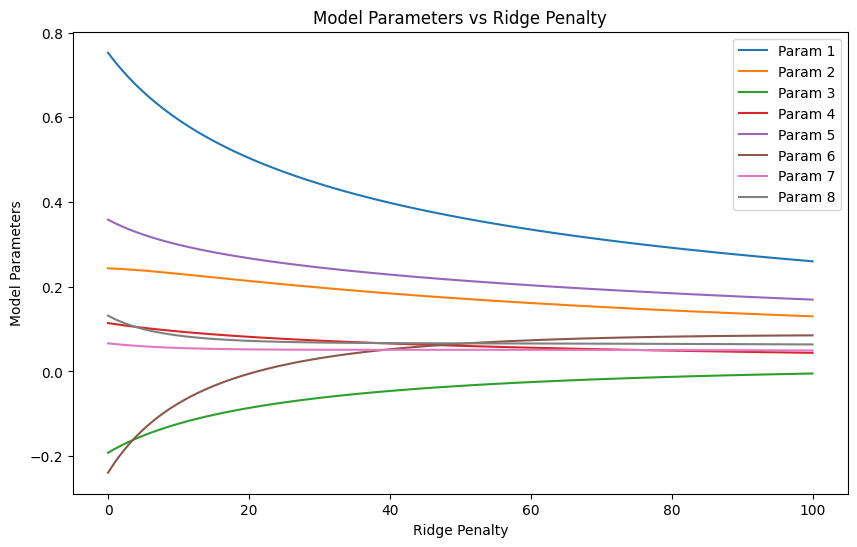

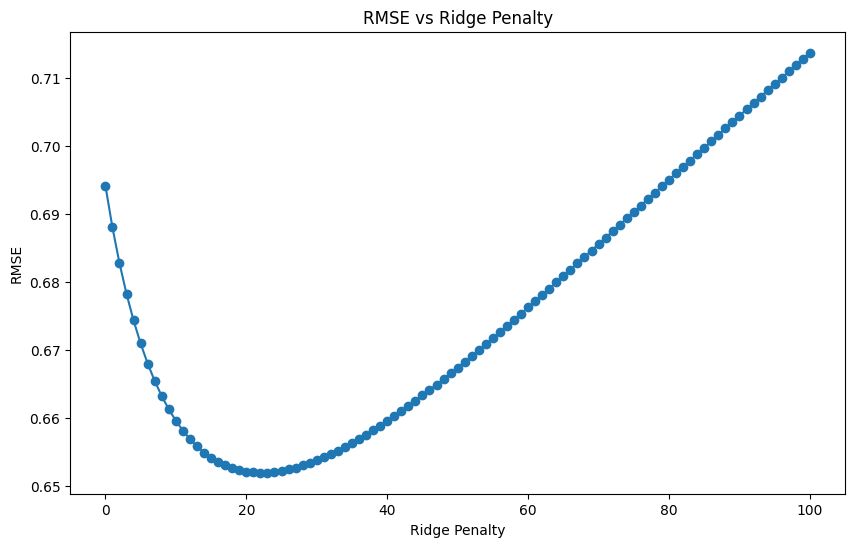

In [22]:
ridge_penalties = np.linspace(0, 100, 101)
model_params_list = []
rmse_values_list = []

for penalty in ridge_penalties:
    ridge_model = RidgeRegression(ridge_penalty=penalty)
    ridge_model.fit(X_train, y_train)

    model_params_list.append(ridge_model.model_params[1:].flatten())

    predictions = ridge_model.predict(X_test)
    rmse_value = ridge_model.rmse(X_test, y_test)
    #print(f"for penalty: {penalty} the rmse value is {rmse_value}")
    rmse_values_list.append(rmse_value)

#print("model parameters are:"); print(model_params_list)

# print("model_param_list")
# print(model_params_list)
model_params_array = np.array(model_params_list)
rmse_values_array = np.array(rmse_values_list)


plot_parameters_vs_penalty(ridge_penalties, model_params_array)
plot_rmse_vs_penalty(ridge_penalties, rmse_values_array)

Comparing this with sklearn's ridge regression's implementation.

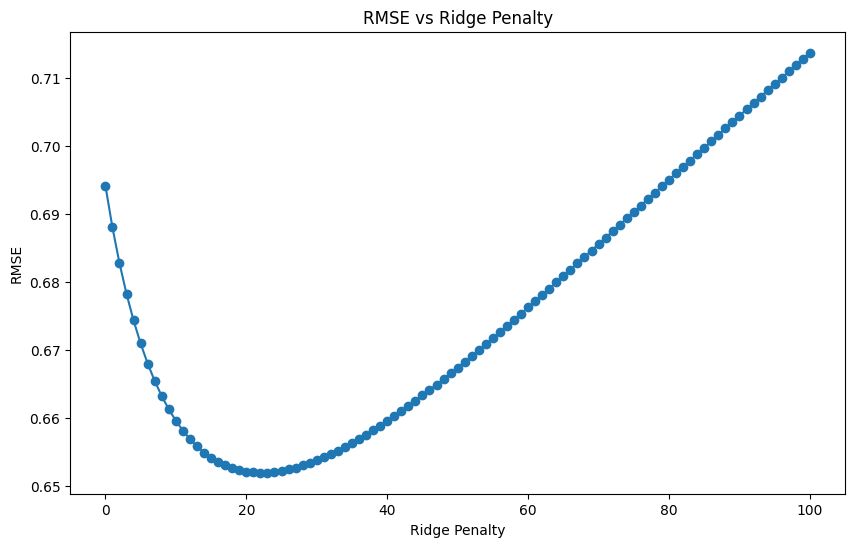

In [23]:
from sklearn.linear_model import Ridge

# Assuming X_train, X_test, y_train, y_test are already defined

# Create a range of ridge penalties
ridge_penalties = np.linspace(0, 100,101)

# Lists to store model parameters and RMSE values
sklearn_model_params_list = []
sklearn_rmse_values_list = []

for penalty in ridge_penalties:
    # Create Ridge Regression model
    ridge_model = Ridge(alpha=penalty)

    # Fit the model
    ridge_model.fit(X_train, y_train)

    # Collect model parameters
    sklearn_model_params_list.append(ridge_model.coef_)

    # Make predictions on the test set
    predictions = ridge_model.predict(X_test)

    # Calculate RMSE
    rmse_value = np.sqrt(mean_squared_error(y_test, predictions))
    #print(f"for penalty: {penalty} the rmse value is {rmse_value}")
    sklearn_rmse_values_list.append(rmse_value)



#print("model parameters are (SKLearn's ridge):"); print(model_params_list)

# Convert lists to numpy arrays for plotting
sklearn_model_params_array = np.array(sklearn_model_params_list)
sklearn_rmse_values_array = np.array(sklearn_rmse_values_list)

#plot_parameters_vs_penalty(ridge_penalties, sklearn_model_params_array)
plot_rmse_vs_penalty(ridge_penalties, sklearn_rmse_values_array)
